In [40]:
library(Biostrings)
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are mask

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 11 rows containing missing values (`geom_bar()`).”


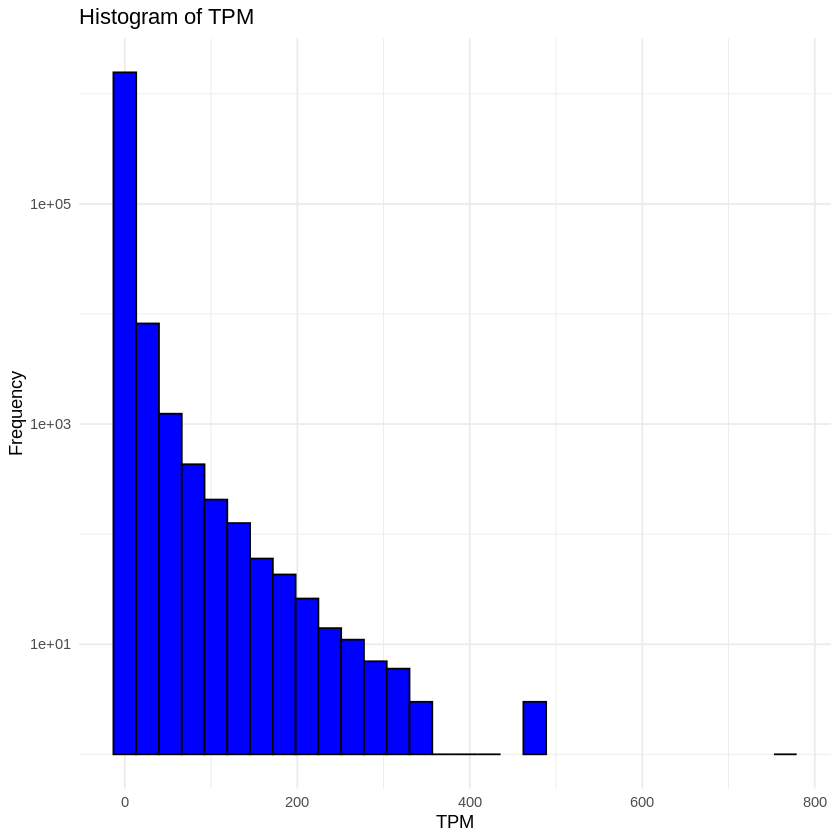

In [4]:
data <- read.csv("/homes/tlin/test/visualise/quant.sf", sep = "\t", header = TRUE)

 ggplot(data, aes(x = TPM)) +
  geom_histogram(fill = "blue", color = "black") +
  theme_minimal() +
  scale_y_log10() +
  labs(title = "Histogram of TPM",
       x = "TPM",
       y = "Frequency")



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 17 rows containing missing values (`geom_bar()`).”


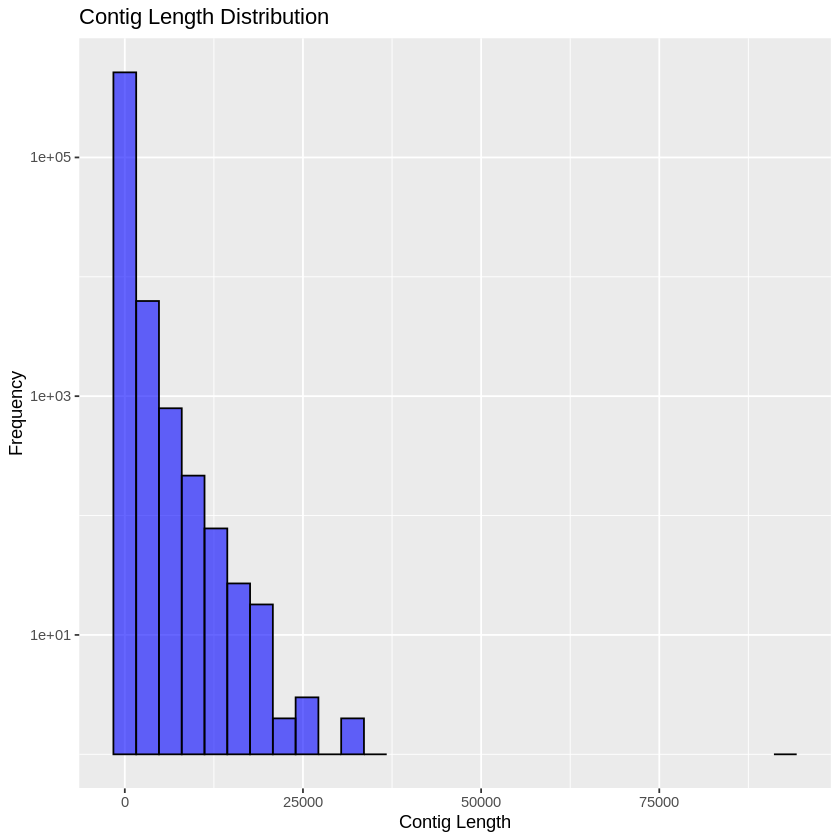

In [5]:


fasta <- readDNAStringSet("/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/Mikrobiom_Test_04_S3/transabyss_contigs.fa")
contig_lengths <- width(fasta)

ggplot() + geom_histogram(aes(x=contig_lengths), fill="blue", color="black", alpha=0.6) +
    scale_y_log10() +
    xlab("Contig Length") + ylab("Frequency") + ggtitle("Contig Length Distribution")



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 124 rows containing missing values (`geom_bar()`).”


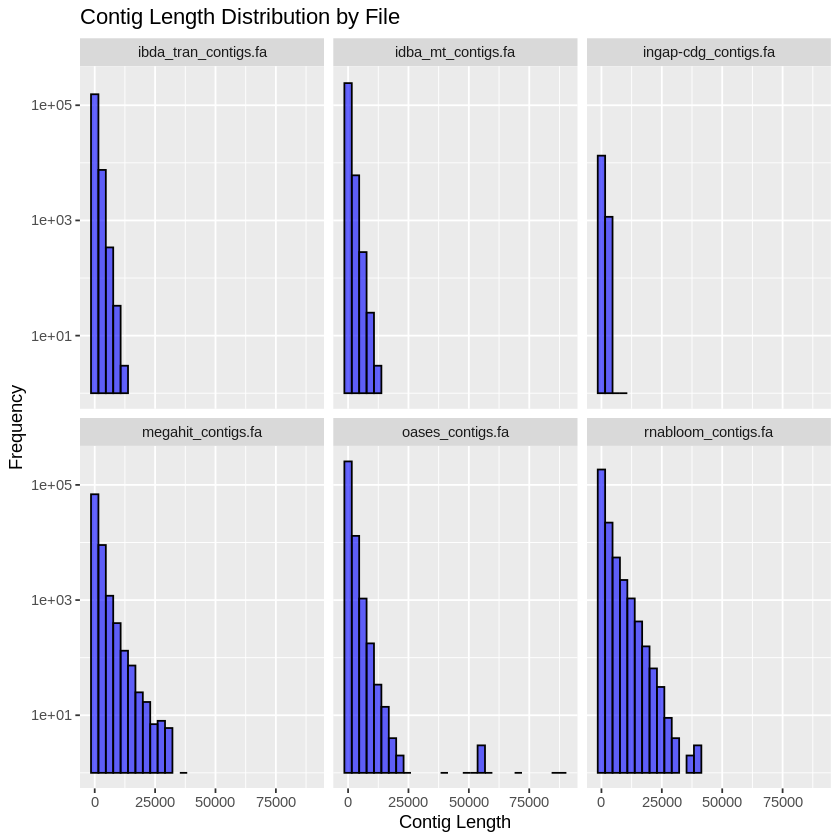

In [10]:
# List of FASTA files
fasta_files <- c(
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/ibda_tran_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/idba_mt_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/ingap-cdg_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/megahit_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/oases_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/rnabloom_contigs.fa"
)
# Function to read a FASTA file and return a data frame with contig lengths and file name
read_contig_lengths <- function(file_path) {
  fasta <- readDNAStringSet(file_path)
  contig_lengths <- width(fasta)
  data.frame(length = contig_lengths, file = basename(file_path))
}

# Read all files and combine into one data frame
all_lengths <- do.call(rbind, lapply(fasta_files, read_contig_lengths))

# Plot the histogram with facets
ggplot(all_lengths, aes(x = length)) +
    geom_histogram(fill = "blue", color = "black", alpha = 0.6) + # Adjust binwidth as needed
    scale_y_log10() +
    facet_wrap(~ file, scales = "fixed") +
    xlab("Contig Length") +
    ylab("Frequency") +
    ggtitle("Contig Length Distribution by Assembler") +
    theme(legend.position = "none")


In [7]:
df <- read.csv("/homes/tlin/Projects/jlab-refbasedassemblereval/test/quast/all_assemblies/report.tsv", sep="\t")

In [23]:

df = df[3, -1]

In [2]:
# All other arguments are FASTA files
fasta_files <- c(
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/ibda_tran_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/idba_mt_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/ingap-cdg_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/megahit_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/oases_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/rnabloom_contigs.fa"
)
# Function to read a FASTA file and return a data frame with contig lengths and file name
read_contig_lengths <- function(file_path) {
  fasta <- readDNAStringSet(file_path)
  contig_lengths <- width(fasta)
  data.frame(length = contig_lengths, file = basename(file_path))
}

# Read all files and combine into one data frame
all_lengths <- do.call(rbind, lapply(fasta_files, read_contig_lengths))

breaks = c(0, 200, 300, 1000, 5000)

# Plot the histogram with facets
ggplot(all_lengths, aes(x = length)) +
    geom_histogram(fill = "blue", color = "black", alpha = 0.6, breaks = breaks) + # Adjust binwidth as needed
    scale_y_log10() +
    facet_wrap(~ file, scales = "fixed") +
    xlab("Contig Length") +
    ylab("Frequency") +
    ggtitle("Contig Length Distribution by Assembler") +
    theme(legend.position = "none")

ERROR: Error in readDNAStringSet(file_path): could not find function "readDNAStringSet"


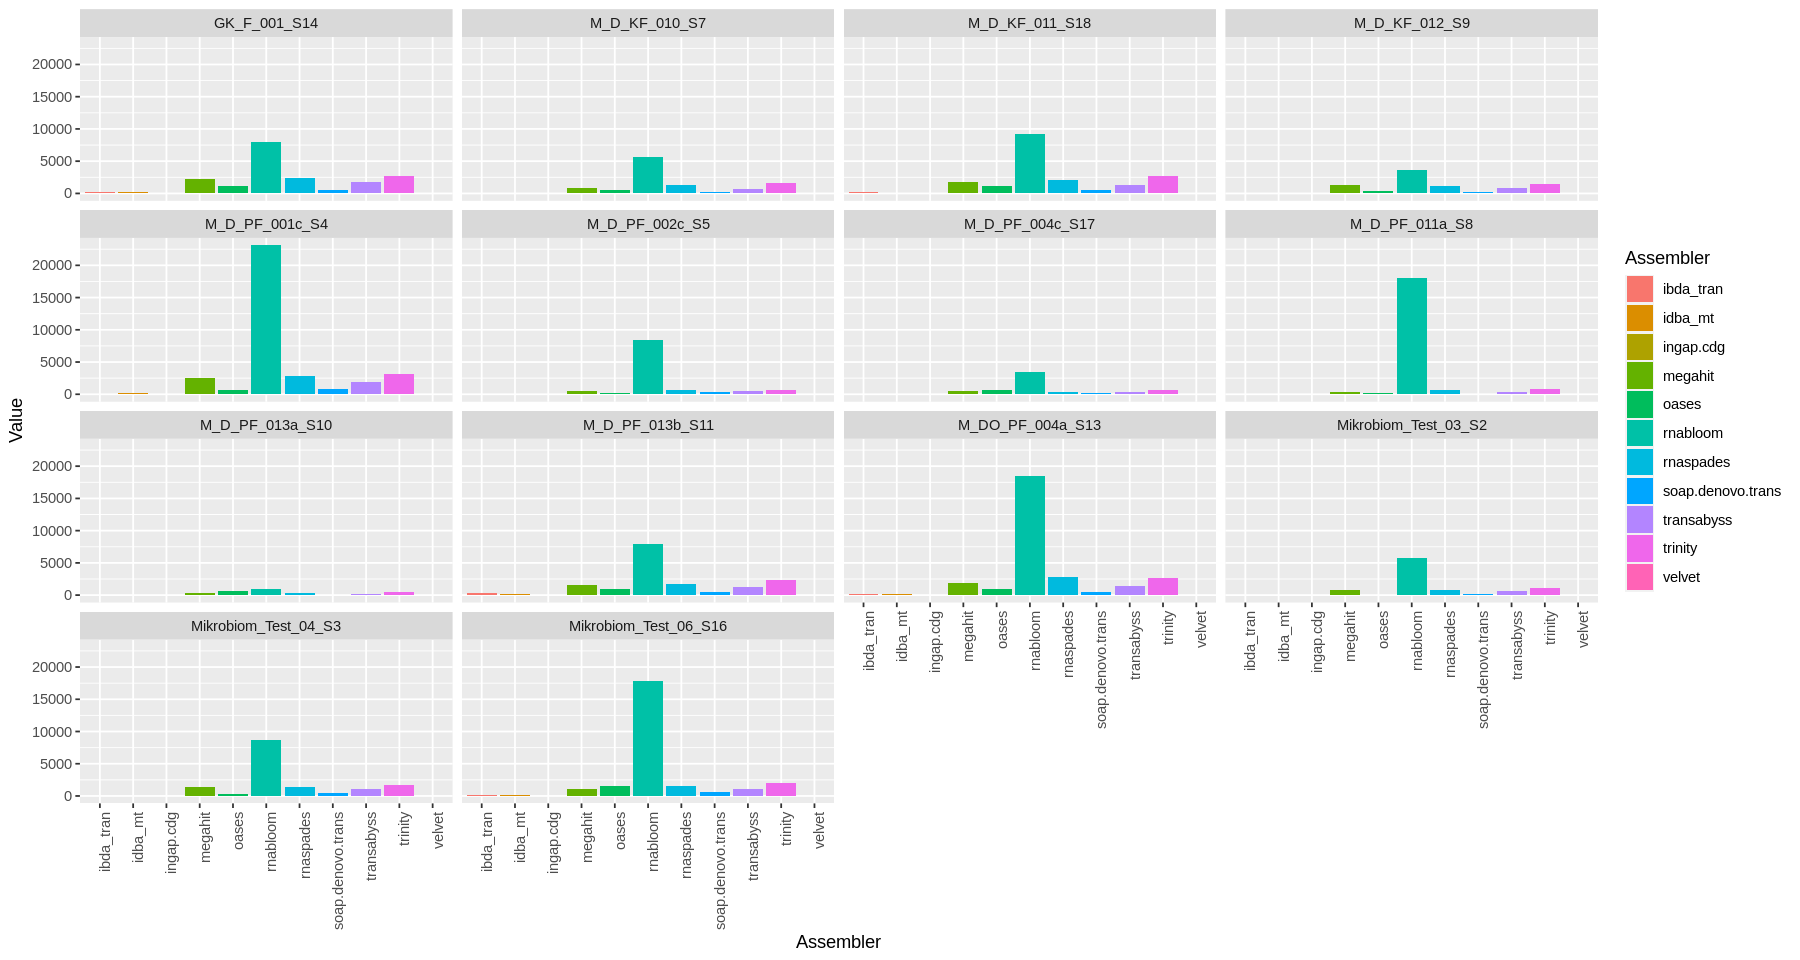

In [41]:
df <- read.csv("/homes/tlin/Projects/jlab-refbasedassemblereval/test/quast/all_assemblies/report.tsv", sep="\t")
options(repr.plot.width=15, repr.plot.height=8)

df = df[3, -1]
names_split <- colnames(df)[-1] %>% 
  strsplit(split = "__")

names_split <- lapply(names_split, function(x) {
    x[2] <- str_remove(x[2], "_contigs")
    x
})

# Creating a new data frame with split names
df_long <- pivot_longer(df, cols = -1, names_to = "complex_name", values_to = "value")

# Adding split names as new columns
df_long <- df_long %>%
  mutate(sample = sapply(names_split, `[`, 1),
         assembler = sapply(names_split, `[`, 2))

# Now you can visualize your data
# Bar plot faceted by sample, with a fixed y-axis scale
ggplot(df_long, aes(x = assembler, y = value, fill = assembler)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  facet_wrap(~sample, scales = "fixed") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = "Assembler", y = "Value", fill = "Assembler") 

In [55]:
df_long

M_D_KF_012_S9__ibda_tran_contigs,complex_name,value,sample,assembler
<dbl>,<chr>,<dbl>,<chr>,<chr>
86,M_D_PF_002c_S5__ibda_tran_contigs,16,M_D_PF_002c_S5,ibda_tran
86,M_D_PF_004c_S17__ibda_tran_contigs,6,M_D_PF_004c_S17,ibda_tran
86,M_D_PF_011a_S8__ibda_tran_contigs,20,M_D_PF_011a_S8,ibda_tran
86,M_D_PF_013b_S11__ibda_tran_contigs,273,M_D_PF_013b_S11,ibda_tran
86,M_D_KF_011_S18__ibda_tran_contigs,152,M_D_KF_011_S18,ibda_tran
86,GK_F_001_S14__ibda_tran_contigs,289,GK_F_001_S14,ibda_tran
86,M_D_KF_010_S7__ibda_tran_contigs,83,M_D_KF_010_S7,ibda_tran
86,M_D_PF_001c_S4__ibda_tran_contigs,208,M_D_PF_001c_S4,ibda_tran
86,M_D_PF_013a_S10__ibda_tran_contigs,6,M_D_PF_013a_S10,ibda_tran


In [56]:
df <- read.csv("/homes/tlin/Projects/jlab-refbasedassemblereval/test/quast/all_assemblies/report.tsv", sep="\t")

df = df[3, -1]

print(df)

  M_D_KF_012_S9__ibda_tran_contigs M_D_PF_002c_S5__ibda_tran_contigs
3                               86                                16
  M_D_PF_004c_S17__ibda_tran_contigs M_D_PF_011a_S8__ibda_tran_contigs
3                                  6                                20
  M_D_PF_013b_S11__ibda_tran_contigs M_D_KF_011_S18__ibda_tran_contigs
3                                273                               152
  GK_F_001_S14__ibda_tran_contigs M_D_KF_010_S7__ibda_tran_contigs
3                             289                               83
  M_D_PF_001c_S4__ibda_tran_contigs M_D_PF_013a_S10__ibda_tran_contigs
3                               208                                  6
  M_DO_PF_004a_S13__ibda_tran_contigs Mikrobiom_Test_03_S2__ibda_tran_contigs
3                                 201                                      14
  Mikrobiom_Test_06_S16__ibda_tran_contigs
3                                      135
  Mikrobiom_Test_04_S3__ibda_tran_contigs M_D_KF_012_S9__idb

In [46]:
library(ggplot2)
library(dplyr)

args <- commandArgs(trailingOnly = TRUE)

# Assuming the last argument is the output file name

quant files = c(
 "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/trinity",
 "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/oases",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/soapdenovotans",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/rnabloom",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/ibdatran",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/idbamt",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/ingapcdg",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/megahit",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/velvet"
)

# Read each file, add a column to identify the file, and combine into one data frame
all_data <- lapply(quant_files, function(file) {
  data <- read.csv(file, sep = "\t", header = TRUE)
  data$Name <- as.integer(as.character(data$Name)) # Convert factor to integer if needed
  data$file <- basename(file) # Add a column with the file name
  return(data)
}) %>% bind_rows()

p <- ggplot(all_data, aes(x = TPM)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha=0.6) +
  facet_wrap(~ file, scales = "fixed") +
  theme_minimal() +
  scale_y_log10() +
  labs(title = "Histogram of TPM",
       x = "TPM",
       y = "Frequency")



ERROR: Error in eval(expr, envir, enclos): object 'M_D_KF_012_S9__ibda_tran_contigs' not found


In [11]:
quant_files <- c(
 "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/trinity",
 "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/oases",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/soapdenovotrans",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/rnabloom",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/ibdatran",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/ibdamt",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/ingapcdg",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/megahit",
    "/vol/jlab/tlin/no_backup/nextflow_workdir/c1/4103ec1742206d4ea8d092f54a4bbc/velvet"
)

In [12]:

all_data <- lapply(quant_files, function(file) {
  data <- read.csv(file, sep = "\t", header = TRUE)
  data$Name <- as.integer(as.character(data$Name)) # Convert factor to integer if needed
  data$file <- basename(file) # Add a column with the file name
  return(data)
}) %>% bind_rows()

all_data <- lapply(args[-length(args)], function(file) {
  data <- read.csv(file, sep = "\t", header = TRUE)
  data$Name <- as.integer(as.character(data$Name)) # Convert factor to integer if needed
  data$file <- basename(file) # Add a column with the file name
  return(data)
}) %>% bind_rows()

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


In [13]:
all_data

Name,Length,EffectiveLength,TPM,NumReads,file
<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
NA,686,458.884,0.889936,22.000,trinity
NA,290,87.984,1.476839,7.000,trinity
NA,233,46.857,1.584612,4.000,trinity
NA,1043,815.664,0.842033,37.000,trinity
NA,567,340.931,2.006973,36.861,trinity
NA,214,34.627,2.144287,4.000,trinity
NA,256,62.667,0.592423,2.000,trinity
NA,215,35.257,1.052988,2.000,trinity
NA,258,64.092,1.448122,5.000,trinity


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1260 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_bar()`).”


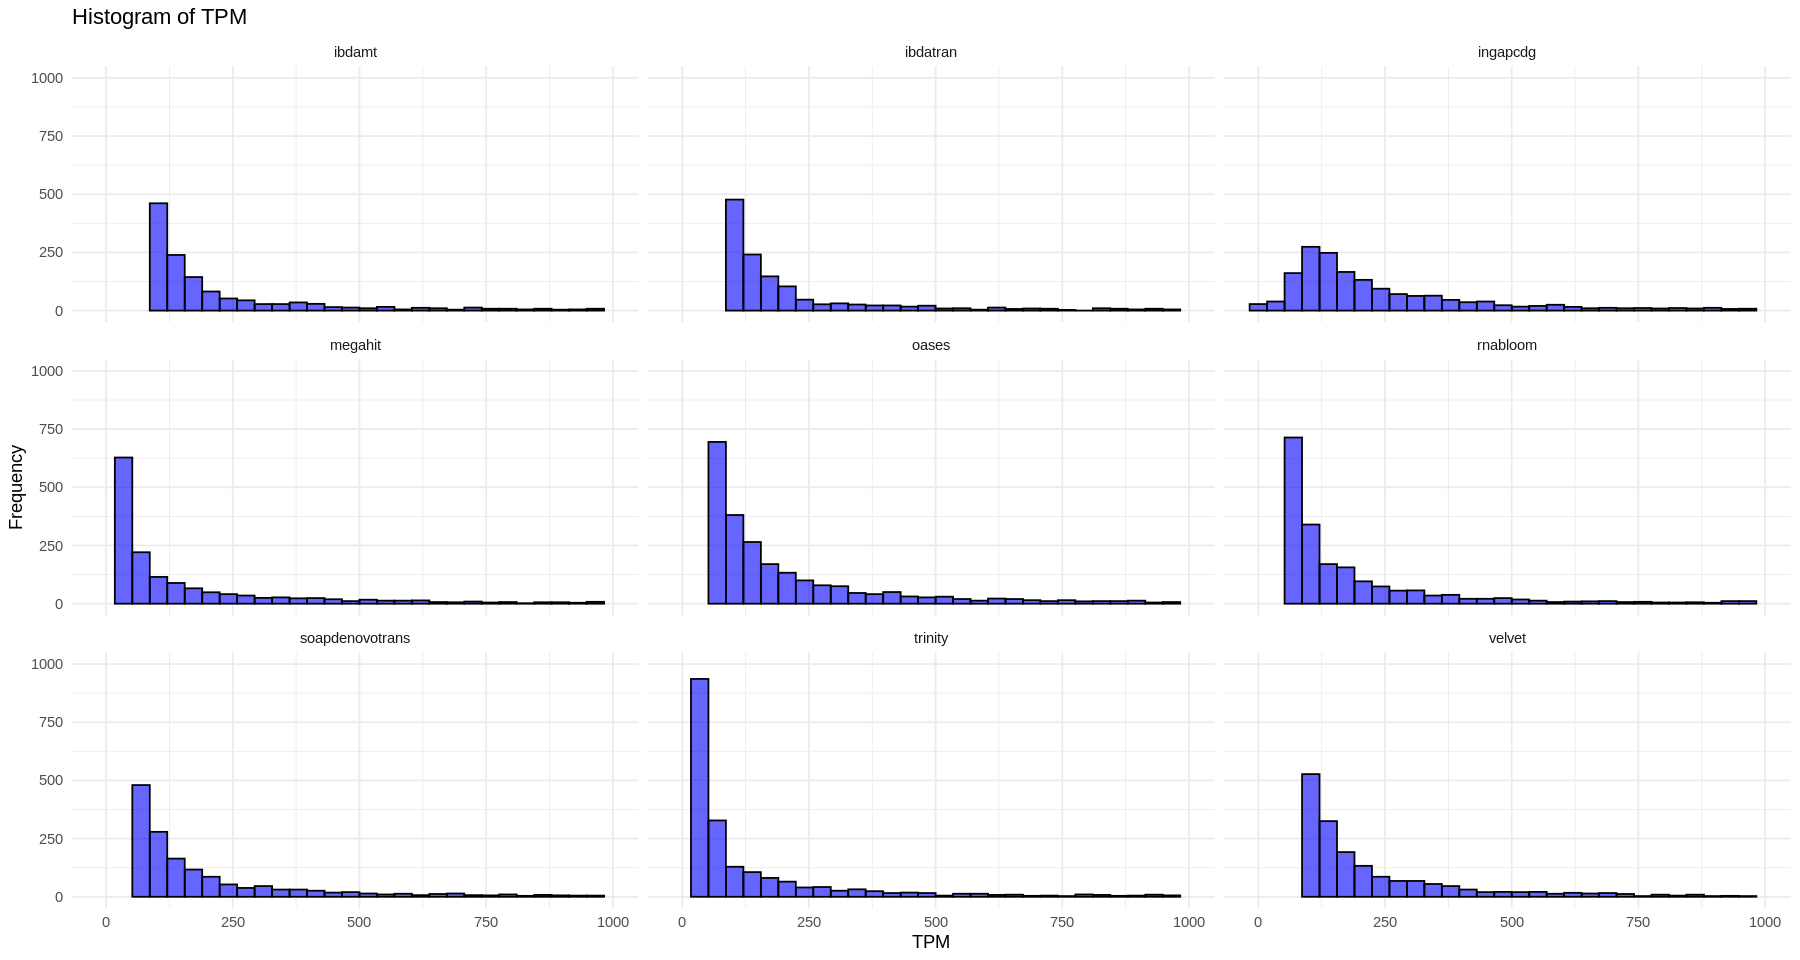

In [63]:
ggplot(all_data, aes(x = TPM)) +
    geom_histogram(fill = "blue", color = "black", alpha=0.6) +
    facet_wrap(~ file, scales = "fixed") +
    theme_minimal() +
   # scale_y_log10() +
    xlim(c(NA, 1000)) +
#    scale_x_log10() +
    ylim(c(NA, 1000)) +
    labs(title = "Histogram of TPM",
        x = "TPM",
        y = "Frequency")
       


In [16]:
sort(all_data$TPM, decreasing = TRUE)

[1] 1.066548e+05 9.063403e+04 8.534983e+04 7.636084e+04 5.697806e+04
    [6] 3.614449e+04 3.537918e+04 3.417252e+04 3.177094e+04 3.103230e+04
   [11] 2.768473e+04 2.682191e+04 2.631435e+04 2.376773e+04 2.244698e+04
   [16] 2.203737e+04 2.192586e+04 2.086234e+04 1.971249e+04 1.962446e+04
   [21] 1.951669e+04 1.879372e+04 1.786404e+04 1.755271e+04 1.743022e+04
   [26] 1.721264e+04 1.716906e+04 1.702687e+04 1.676063e+04 1.602348e+04
   [31] 1.503254e+04 1.474601e+04 1.466262e+04 1.453217e+04 1.431336e+04
   [36] 1.385554e+04 1.341559e+04 1.339604e+04 1.337130e+04 1.322537e+04
   [41] 1.317995e+04 1.283699e+04 1.213846e+04 1.202313e+04 1.200172e+04
   [46] 1.175194e+04 1.168189e+04 1.162324e+04 1.149976e+04 1.144793e+04
   [51] 1.129133e+04 1.120367e+04 1.118827e+04 1.118446e+04 1.111278e+04
   [56] 1.109453e+04 1.086900e+04 1.075781e+04 1.070073e+04 1.069432e+04
   [61] 1.066729e+04 1.054607e+04 1.045977e+04 1.038163e+04 9.816385e+03
   [66] 9.786454e+03 9.732880e+03 9.640296e+03 9.609067e+03 9.357350e+03
   [71] 9.333661e+03 9.144803e+03 9.141986e+03 9.061386e+03 8.904821e+03
   [76] 8.755146e+03 8.583706e+03 8.526865e+03 8.380238e+03 8.350161e+03
   [81] 8.209025e+03 8.203007e+03 8.182750e+03 8.057985e+03 7.956198e+03
   [86] 7.906221e+03 7.895008e+03 7.852260e+03 7.785387e+03 7.757549e+03
   [91] 7.674253e+03 7.646798e+03 7.642218e+03 7.483597e+03 7.405766e+03
   [96] 7.368102e+03 7.350715e+03 7.343215e+03 7.304893e+03 7.233250e+03
  [101] 7.199743e+03 7.196744e+03 7.191826e+03 7.161967e+03 7.158547e+03
  [106] 7.122918e+03 7.110831e+03 7.097465e+03 7.005466e+03 6.953770e+03
  [111] 6.919018e+03 6.724940e+03 6.621047e+03 6.620382e+03 6.599524e+03
  [116] 6.592966e+03 6.574106e+03 6.453525e+03 6.433479e+03 6.427902e+03
  [121] 6.398744e+03 6.395248e+03 6.394481e+03 6.344290e+03 6.316604e+03
  [126] 6.245553e+03 6.241698e+03 6.236450e+03 6.199878e+03 6.171011e+03
  [131] 6.144548e+03 6.110641e+03 6.065059e+03 6.046283e+03 5.992018e+03
  [136] 5.980391e+03 5.980191e+03 5.912255e+03 5.900216e+03 5.889856e+03
  [141] 5.877904e+03 5.861751e+03 5.803927e+03 5.762578e+03 5.736494e+03
  [146] 5.709917e+03 5.668735e+03 5.651203e+03 5.631881e+03 5.631291e+03
  [151] 5.623415e+03 5.568904e+03 5.563670e+03 5.561691e+03 5.529137e+03
  [156] 5.520374e+03 5.519915e+03 5.495545e+03 5.467532e+03 5.439088e+03
  [161] 5.437166e+03 5.419475e+03 5.402996e+03 5.398683e+03 5.332670e+03
  [166] 5.313797e+03 5.313376e+03 5.297833e+03 5.287511e+03 5.283667e+03
  [171] 5.267465e+03 5.244119e+03 5.191265e+03 5.174630e+03 5.166033e+03
  [176] 5.148227e+03 5.124176e+03 5.084186e+03 5.020401e+03 5.011956e+03
  [181] 5.008721e+03 4.969042e+03 4.967161e+03 4.946002e+03 4.931057e+03
  [186] 4.923133e+03 4.879918e+03 4.874832e+03 4.869750e+03 4.843390e+03
  [191] 4.829600e+03 4.823180e+03 4.781101e+03 4.774431e+03 4.757303e+03
  [196] 4.736102e+03 4.725522e+03 4.699986e+03 4.691556e+03 4.668845e+03
  [201] 4.644395e+03 4.629248e+03 4.621684e+03 4.621473e+03 4.607923e+03
  [206] 4.581700e+03 4.548220e+03 4.526874e+03 4.507123e+03 4.499942e+03
  [211] 4.466943e+03 4.464138e+03 4.460312e+03 4.441111e+03 4.437219e+03
  [216] 4.406752e+03 4.404574e+03 4.403990e+03 4.397609e+03 4.385995e+03
  [221] 4.364442e+03 4.364442e+03 4.353972e+03 4.346851e+03 4.343758e+03
  [226] 4.323628e+03 4.292105e+03 4.287382e+03 4.271008e+03 4.266307e+03
  [231] 4.265305e+03 4.245823e+03 4.245311e+03 4.228224e+03 4.192628e+03
  [236] 4.139338e+03 4.131231e+03 4.122520e+03 4.121479e+03 4.112554e+03
  [241] 4.107647e+03 4.106270e+03 4.098841e+03 4.072725e+03 4.064898e+03
  [246] 4.058567e+03 4.057599e+03 4.053580e+03 4.051818e+03 4.045322e+03
  [251] 4.043991e+03 4.043263e+03 4.013045e+03 3.990076e+03 3.981256e+03
  [256] 3.972560e+03 3.955755e+03 3.928675e+03 3.925144e+03 3.916310e+03
  [261] 3.903223e+03 3.902329e+03 3.901000e+03 3.891374e+03 3.889898e+03
  [266] 3.889897e+03 3.875020e+03 3.871247e+03 3.862351e+03 3.854851e+03
  [271] 3.832936e+03 3.814036e+03 3.810426e+03 3.808153e+03 3.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 205 rows containing missing values (`geom_bar()`).”


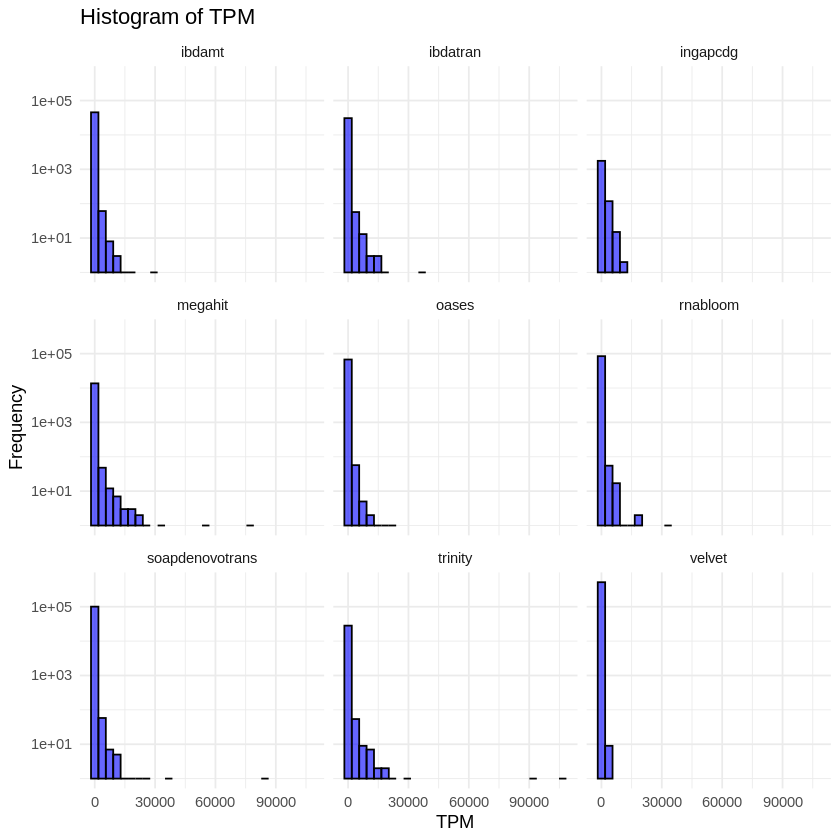

In [36]:
ggplot(all_data, aes(x = TPM)) +
    geom_histogram(fill = "blue", color = "black", alpha=0.6) +
    facet_wrap(~ file, scales = "fixed") +
    theme_minimal() +
    scale_y_log10() +
    #xlim(c(NA, 10000)) +
    #ylim(c(NA, 100)) +
    labs(title = "Histogram of TPM",
        x = "TPM",
        y = "Frequency")
       


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 64 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 73 rows containing missing values (`geom_bar()`).”


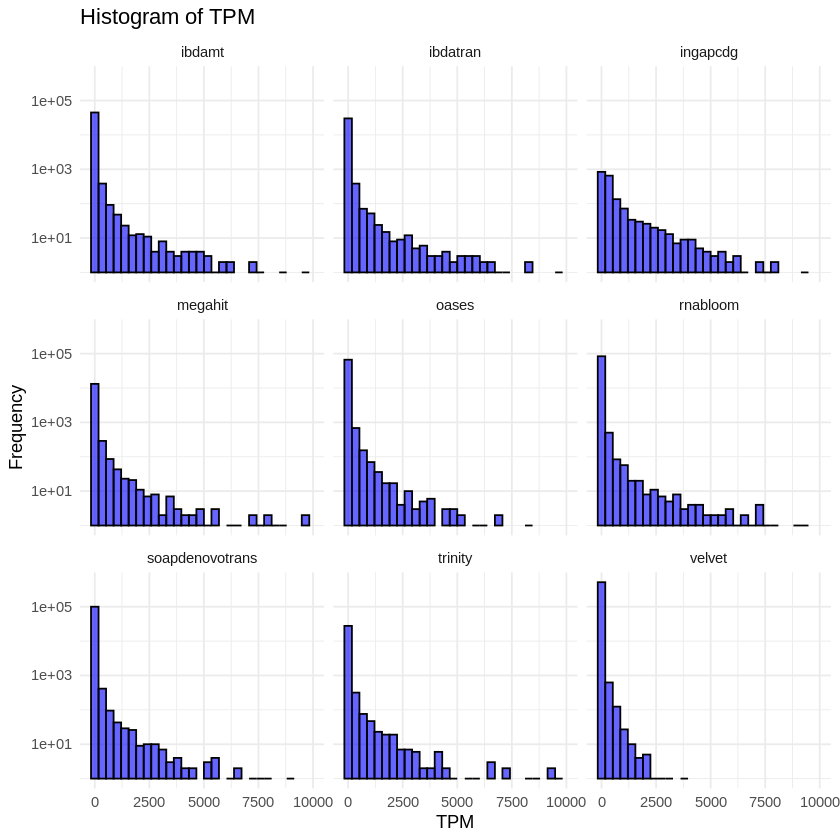

In [38]:
ggplot(all_data, aes(x = TPM)) +
    geom_histogram(fill = "blue", color = "black", alpha=0.6) +
    facet_wrap(~ file, scales = "fixed") +
    theme_minimal() +
    scale_y_log10() +
    xlim(c(NA, 10000)) +
    #ylim(c(NA, 100)) +
    labs(title = "Histogram of TPM",
        x = "TPM",
        y = "Frequency")
       
